In [16]:
from src.spatial_unit import baltimore_grids

from src.constants import PathShape
%matplotlib inline
import geopandas as gp

# cityline

In [56]:
cityline = gp.read_file('data/cityline-baltimore.geojson')
cityline.plot()

# grids

In [8]:
for grid_side in [50, 100, 150, 200, 250, 1000]:
    grids = baltimore_grids(grid_side=grid_side, cityline_path=PathShape.cityline)
    grids.Cen_coords= grids.Cen_coords.astype(str)
    grids['side'] = grid_side
    grids.to_file('data/baltimore-spu-grid-side-%d.geojson' % grid_side,driver="GeoJSON")

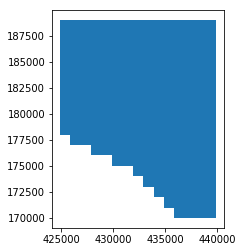

In [53]:
grids_loaded = gp.read_file('data/baltimore-spu-grid-side-1000.geojson')

grids_loaded.plot()

# bnia neighboorhood

In [50]:
bnia = gp.read_file('data/open-baltimore/raw/Vital_Signs_15_Census_Demographics.geojson')
bnia = bnia.to_crs(epsg=3559)
bnia['Area'] = bnia.geometry.apply(lambda x: x.area)
bnia['Cen_coords'] = bnia.geometry.apply(lambda x: str(x.centroid.coords[0]))
bnia[['CSA2010', 'geometry', 'Cen_coords', 'Area']].set_index('CSA2010').to_file('data/baltimore-BNIA-neighborhood.geojson', driver='GeoJSON')

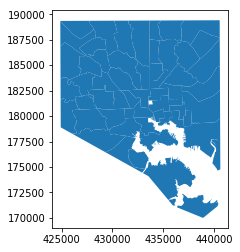

In [60]:
bnia_loaded = gp.read_file('data/baltimore-BNIA-neighborhood.geojson')
bnia_loaded.plot()